Before one builds a CVAE (Conditional Variational Autoencoder), they should first build a VAE. The VAE should be able to reconstruct the input image very well - important to have before you add complexity, making it conditional on something else (in our case, this would be the crystal structure) as well. This notebook aims to show that a convolutional VAE is suitable.

We have two main parts, and a couple more  important factors to play around with, not including the usual ML ones (optimizer, lr, etc):
- Encoder
- Decoder
- Latent dimensions
- Loss function

We need to encode the input image into two vectors, mean and variance in the latent space (see: Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014). We then reparameterize these two into one vector, which gets passed into the decoder. The decoder simply turns this vector into a new image.

This test uses ZNCC loss, 64 latent dimensions, and then a conv->deconv setup for the VAE.

In [1]:
import os
import sys
import torch
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

In [3]:
sys.path.append(os.path.abspath(os.path.join('..')))
from src.models.components.vae import Model

data_loc = "../data/VAE000/cleaned_data/"

In [4]:
model = Model()
model.load_state_dict(torch.load("models/vae.pt"))
model.eval()

Model(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): ResDown(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (bn1): BatchNorm2d(16, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(32, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act_fnc): ELU(alpha=1.0)
    )
    (2): ResDown(
      (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (bn1): BatchNorm2d(32, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(32, 64, kernel_si

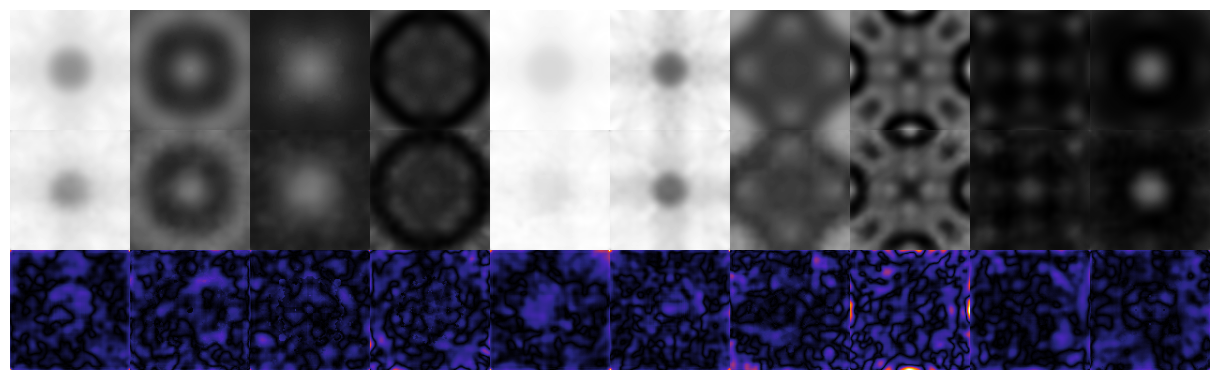

In [44]:
sample_size = 10
CISD_codes = os.listdir(data_loc)

patterns = np.concatenate([np.clip(np.fromfile(
    os.path.join(data_loc, code, code+"_+0+0+0.bin"),
    dtype=np.float64), 0.0, 1.0).reshape((128, 128)) for code in np.random.choice(CISD_codes, sample_size)], axis=0)
patterns_tensor = torch.from_numpy(patterns).to(torch.float32).clone().detach().view(sample_size, 1, 128, 128)
reconstructions_tensor, mu, logvar = model.forward(patterns_tensor)
reconstructions = reconstructions_tensor.view(sample_size * 128, 128).detach().numpy()

patterns = patterns - np.min(patterns)
patterns = patterns * (1 / np.max(patterns))
reconstructions = reconstructions - np.min(reconstructions)
reconstructions = reconstructions * (1 / np.max(reconstructions))
difference = np.abs(reconstructions - patterns)
difference = np.clip(5 * difference, 0.0, 1.0)

fig = plt.figure(figsize=(25, 4))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1],
         wspace=0.0, hspace=0.0, top=0.95, bottom=0.05, left=0.17, right=0.845) 

for i, (ax, img) in enumerate(zip([plt.subplot(gs[0, 0]), plt.subplot(gs[1, 0]), plt.subplot(gs[2, 0])],
                   [patterns.T, reconstructions.T, difference.T])):
    ax.imshow(img, cmap=("CMRmap" if i==2 else "gray"))
    ax.set_axis_off()

plt.show()


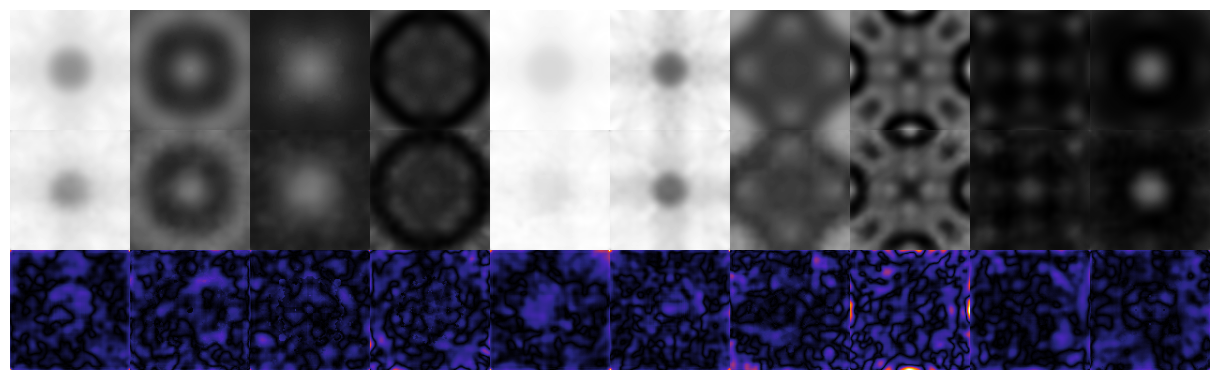

In [ ]:
sample_size = 10
CISD_codes = os.listdir(data_loc)

patterns = np.concatenate([np.clip(np.fromfile(
    os.path.join(data_loc, code, code+"_+0+0+0.bin"),
    dtype=np.float64), 0.0, 1.0).reshape((128, 128)) for code in np.random.choice(CISD_codes, sample_size)], axis=0)
patterns_tensor = torch.from_numpy(patterns).to(torch.float32).clone().detach().view(sample_size, 1, 128, 128)
reconstructions_tensor, mu, logvar = model.forward(patterns_tensor)
reconstructions = reconstructions_tensor.view(sample_size * 128, 128).detach().numpy()

patterns = patterns - np.min(patterns)
patterns = patterns * (1 / np.max(patterns))
reconstructions = reconstructions - np.min(reconstructions)
reconstructions = reconstructions * (1 / np.max(reconstructions))
difference = np.abs(reconstructions - patterns)
difference = np.clip(5 * difference, 0.0, 1.0)

fig = plt.figure(figsize=(25, 4))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1],
         wspace=0.0, hspace=0.0, top=0.95, bottom=0.05, left=0.17, right=0.845) 

for i, (ax, img) in enumerate(zip([plt.subplot(gs[0, 0]), plt.subplot(gs[1, 0]), plt.subplot(gs[2, 0])],
                   [patterns.T, reconstructions.T, difference.T])):
    ax.imshow(img, cmap=("CMRmap" if i==2 else "gray"))
    ax.set_axis_off()

plt.show()
